# Customer Service Requests Analysis

#Background of Problem Statement :
NYC 311's mission is to provide the public with quick and easy access to all New York City government services and 
information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several 
hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars.
These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. 
The agency responds to the request, addresses it, and then closes it.

#Problem Objective :
#Perform a service request data analysis of New York City 311 calls. Major focus will be on the data wrangling techniques to understand the pattern in the data and the major complaint types and verify the assumptions about below 2 queries.
1. Whether the average response time across complaint types is similar or not (overall)
2. Are the type of complaint or service requested and location related?

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#1. Load 311 NYC service request data.

df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",low_memory=False)


In [3]:
# Check the size of dataset
df.shape

(300698, 53)

- Size of dataset is large. Dataset contains 300k records and 53 features. 
- Most of the features are object data type,  10 are decimal type and only one is integer type.
- All Date related data type are objects.

In [4]:
# Check top 5 records
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


- Some of the features contains blank data. Need to check details about features and their null values

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

- Total 53 features are available in dataset of which majority of them are Object(42), Float(10),Integer(1)
- Features contains Complaints related Agency, created date, closed date, Due date, types, description,
    location related info,Borough, City, Address, Street, Longitude, Latitude.
- Most of the features will not be relevant for our complaint type analysis, so we will drop them.

In [6]:
delete_features = ['Unique Key','Agency Name','Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
        'Resolution Action Updated Date','Facility Type',
       'Community Board', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Location','Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','Incident Address','Landmark']

In [7]:
# It is better to copy dataset into new dataframe, so that if in case need arise it will be helpful for finding some feature
df_data = df.copy()

In [8]:
df_data.drop(delete_features,inplace=True,axis=1)
df_data.shape

(300698, 15)

In [9]:
df_data.isnull().sum()

Created Date                  0
Closed Date                2164
Agency                        0
Complaint Type                0
Descriptor                 5914
Location Type               131
Incident Zip               2615
Street Name               44410
City                       2614
Status                        0
Due Date                      3
Resolution Description        0
Borough                       0
Latitude                   3540
Longitude                  3540
dtype: int64

In [10]:
# Check the status of complaints
Status = df_data.groupby('Status')
print(Status['Status'].count())

Status
Assigned       786
Closed      298471
Draft            2
Open          1439
Name: Status, dtype: int64


In [11]:
# Check the percentage of Closed, Open and Assigned complaints

print('Closed complaint percentage: ',(Status.get_group('Closed').count()/df_data.count())[0]*100)
print('Open complaint percentage: ',(Status.get_group('Open').count()/df_data.count())[0]*100)
print('Assigned complaint percentage: ',(Status.get_group('Assigned').count()/df_data.count())[0]*100)

Closed complaint percentage:  99.25938981968619
Open complaint percentage:  0.4785532328116582
Assigned complaint percentage:  0.2613918283460482


- The dataset contains more than 99 percent records is for Closed Complaints.Very few records is for other complaint type
- We need to do analysis only for Closed complaints.

In [12]:
# Filter dataset only for Closed Complaints
df_data = df_data[df_data['Status']=='Closed']
df_data.shape

(298471, 15)

In [13]:
# As there is only one value in  status so we will drop that feature also
df_data.drop('Status',inplace=True,axis=1)
df_data.shape

(298471, 14)

In [14]:
df_data.isnull().sum()

Created Date                  0
Closed Date                   0
Agency                        0
Complaint Type                0
Descriptor                 5903
Location Type                65
Incident Zip                507
Street Name               44386
City                        506
Due Date                      0
Resolution Description        0
Borough                       0
Latitude                   1432
Longitude                  1432
dtype: int64

In [15]:
# Remove records for whcih City is blank
df_data.dropna(subset=['City'],inplace=True,axis=0)

In [16]:
df_data.drop(df_data[df_data.Borough =='Unspecified'].index, inplace=True)

In [17]:
#Convert the columns ‘Created Date’,'Closed Date’ and 'Due Date' to datetime datatype  

df_data['Created Date']= pd.to_datetime(df_data['Created Date'])
df_data['Closed Date'] = pd.to_datetime(df_data['Closed Date'])
df_data['Due Date'] = pd.to_datetime(df_data['Due Date'])

In [18]:
df_data.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Created Date,297964,257271,2015-11-06 23:34:00,9,2015-03-29 00:33:01,2015-12-31 23:59:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed Date,297964,236730,2015-11-08 07:34:00,24,2015-03-29 00:57:23,2016-01-03 16:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency,297964,1,NYPD,297964,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Type,297964,21,Blocked Driveway,76735,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Descriptor,292064,41,Loud Music/Party,60711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Type,297905,15,Street/Sidewalk,247076,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Zip,297961.0,NaN,NaN,NaN,NaT,NaT,10848.918556,583.178421,83.0,10310.0,11208.0,11238.0,11697.0
Street Name,253611,6641,BROADWAY,3199,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,297964,53,BROOKLYN,98275,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Due Date,297964,257628,2015-11-07 07:34:00,9,2015-03-29 08:33:01,2016-01-01 07:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Major Observations 
- 21 complaint types are registered
- Major complaint type is 'Blocked Driveway'
- Most of the complaint description is related with Noise 'Loud Music/Party'
- Majority of complaints happened on Street/Sidewalk
- BROADWAY street is the main area where most of incidents are happened.
- Maximum complaints reported in BROOKLYN

### Complain duration (Month, Day, Hr) related analysis

Data available from :  2015-03-29 00:33:01
Till date:  2015-12-31 23:59:45


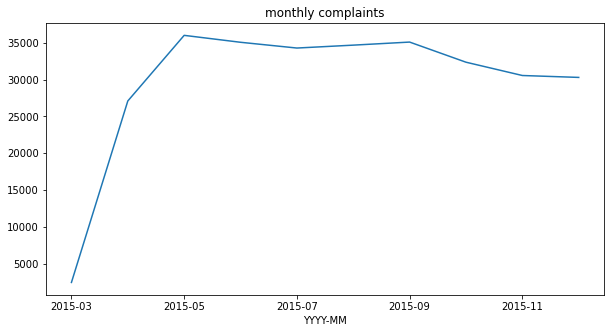

In [19]:
print('Data available from : ',min(df_data['Created Date']))
print('Till date: ',max(df_data['Created Date']))

# monthwise complaints
df_data['YYYY-MM'] = df_data['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

monthly_incidents =  df_data.groupby('YYYY-MM')['Created Date'].count().plot(figsize=(10,5), title='monthly complaints');


- Highest number of complaints registered in May 2015
- Lowest number of complaints registered in Mar 2015

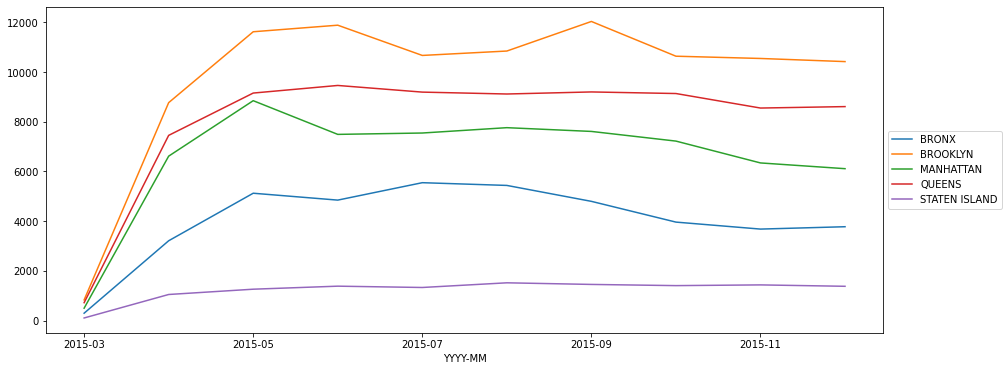

In [20]:
#### Borough wise monthly complaint analysis
monthly_incidents =  df_data.groupby(['YYYY-MM','Borough'])['Borough'].count()

monthly_incidents.unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));


-  Brooklyn has more number of complaints than other borough
- Highest number of complaints in Brooklyn is in the month of Sep while in Manhattan and Bronx it is in May.
- In Staten Iseland the number of complaints are almost same in every month. 

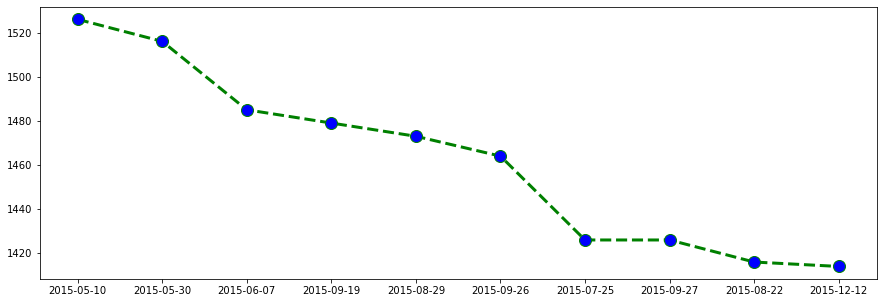

In [21]:
##### Top 10 days where most complaints are registered
import matplotlib.dates as dates

cdate = df_data['Created Date'].dt.date

top10_days = df_data.groupby(cdate)['Created Date'].count().sort_values(ascending=False).reset_index(name='counts').head(10)
top10_days['Created Date'] = top10_days['Created Date'].astype(str)

plt.figure(figsize=(15,5))
plt.plot(top10_days['Created Date'], top10_days['counts'], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

In [22]:
#### Highest complaints reported on 10-May-2015 followed by 30-May-2015

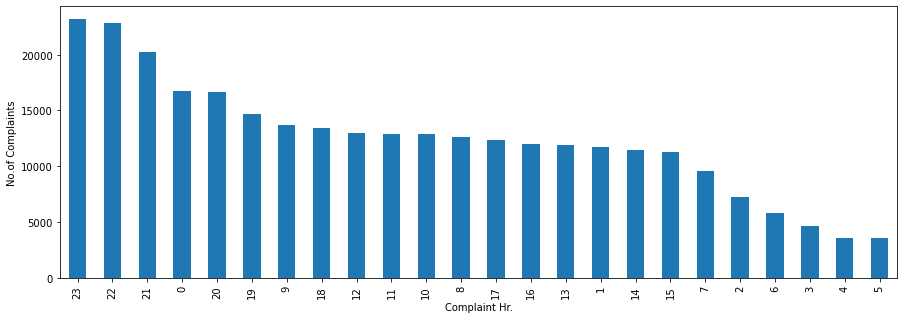

In [23]:
# Analyze the peak time and low time for complaints 


df_data['ComplaintTime'] = [datetime.datetime.time(d).hour for d in df_data['Created Date']] 

CompaintTime = df_data.groupby('ComplaintTime')['ComplaintTime'].count().sort_values(ascending=False)

plt.figure(figsize=(15,5))

ax = CompaintTime.plot.bar()

ax.set_xlabel("Complaint Hr.")
ax.set_ylabel("No.of Complaints")
plt.show()


- Most of the complaints reported during night time between 9-12 PM.
- Less complaints are reported in the early morning between 3-5 AM.

### Complaint types

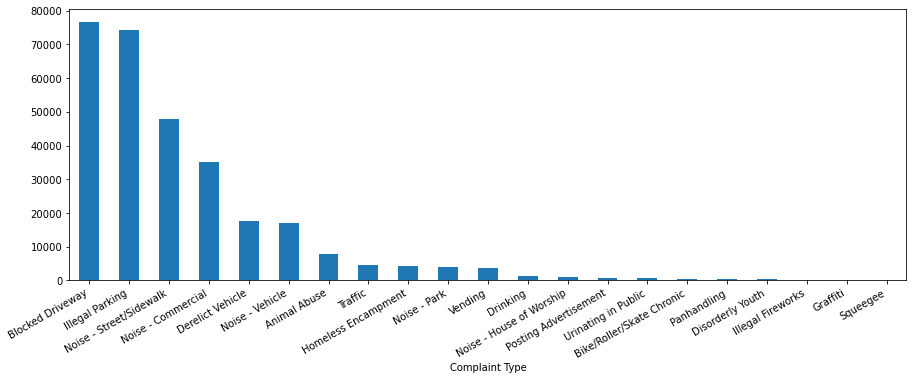

In [24]:
###Type of complaints
ComplaintData = df_data.groupby('Complaint Type')['Complaint Type'].count().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ComplaintData.plot.bar()
plt.xticks(rotation=30, ha='right')
plt.show()

 - Major complaint types are 
     - 'Blocked Driveway', 'Illegal Parking', 'Noise -Street/Sidewalk', 'Noice - Commercial',  'Derelict Vehicle' & 'Noice-Vehicle'

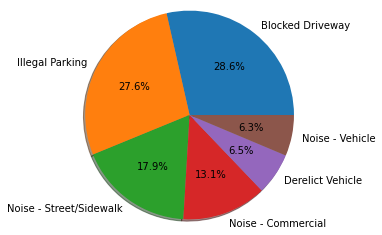

In [25]:
#### Check the percentage of top 6 complaint types

ComplaintData = ComplaintData.head(6)
counts = ComplaintData.values.tolist()
slices = ComplaintData.index
plt.pie(counts, labels = slices, shadow = True, 
        radius = 1.2, autopct = '%1.1f%%')
    
plt.show()

- Major compliant types contribution in total complaints are

     - 'Blocked Driveway' (25.75%),
     - 'Illegal Parking'(24.93%),
     - 'Noise -Street/Sidewalk'(16.10%),
     - 'Noice - Commercial' (11.80%), 
     - 'Derelict Vehicle' (5.88%) 
     - 'Noice-Vehicle'(5.71%)

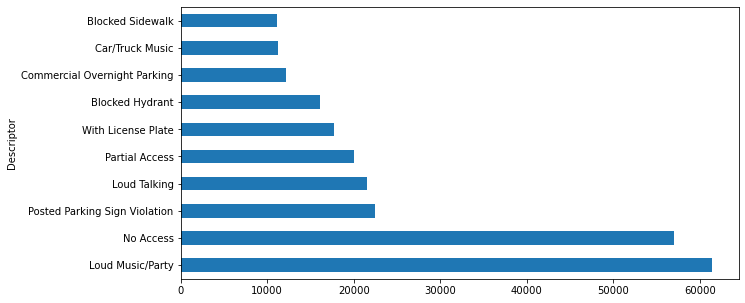

In [26]:
top_10_desc = df.groupby('Descriptor')['Unique Key'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_10_desc.plot.barh()
plt.show()

 - 'Major Noise related complaints is Loud Music/Party' followed by Loud Talking 
 - 'No Access' is the major 'Blocked Driveway' related complaints followed by Partial Access
 - 'Posted Parking Sign Violation' is the major 'Illegal Parking' related complaints followed by 'Commercial Overnight Parking'

### Location type complaints

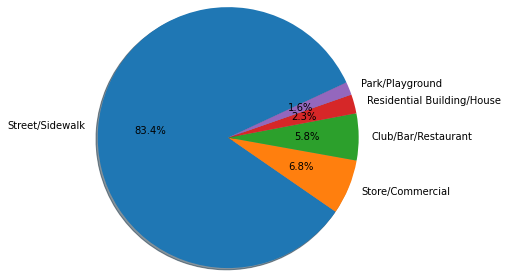

In [27]:
#Location Type
top5_loc = df_data['Location Type'].value_counts().sort_values(ascending=False).head(5)

slices = top5_loc.keys().tolist()
counts = top5_loc.tolist()

plt.pie(counts, labels = slices, 
        startangle=25, shadow = True, 
        radius = 1.5, autopct = '%1.1f%%')
    
plt.show()

 - Street/Sidewalk location type has a major contribution (83.4%) of complaints 
 - lowest number of complaints reported from Park/Playground (1.6%) location type.

###  Location related complaints

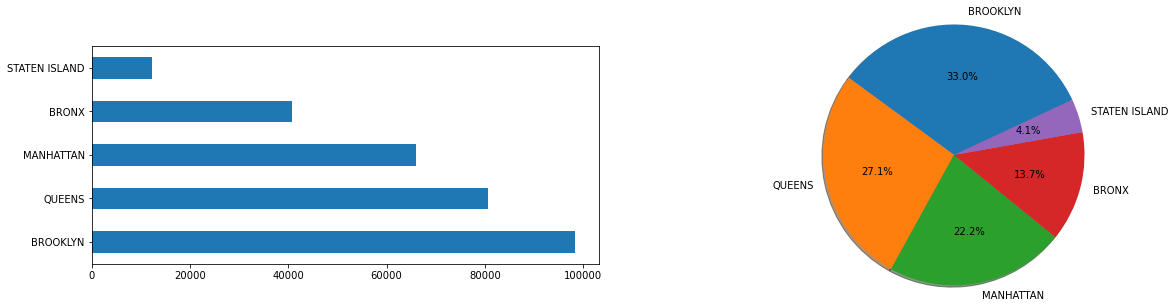

In [28]:
#Borough

plt.figure(figsize=(20,4))
plt.subplot(121)
df_data['Borough'].value_counts().sort_values(ascending=False).plot.barh()

plt.subplot(122)
df_borogh_count = df_data['Borough'].value_counts()

#Percentage of complaints for each Borough

slices = df_borogh_count.index
counts = df_borogh_count.values.tolist()

plt.pie(counts, labels = slices, 
        startangle=25, shadow = True, 
        radius = 1.5, autopct = '%1.1f%%')

   
plt.show()

 - Most of the complaints (33%) is from Brooklyn borough folowed by Queens(27.1%) and Manhattan(22.2%)
 - Lowest number of complaints is from Staten Island borough

#### Analysing more for 6 major types of complaints for each Borough

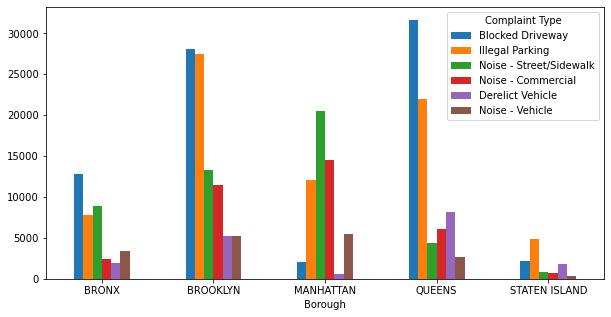

In [29]:
crosstb = pd.crosstab(df_data.Borough, df_data['Complaint Type'])
crosstb = crosstb.loc[slice(None), ['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial',
                                    'Derelict Vehicle', 'Noise - Vehicle']]
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0,figsize=(10,5))
plt.show()

-  Queens and Brooklyn both have the highest number of complaints for 'Blocked Driveway' followed by 'Illegal Parking'
- Noise related complaints are more in Manhattan but good things is that 'Blocked Driveaway' is a lowest among all borough.

#### Citywise complaints

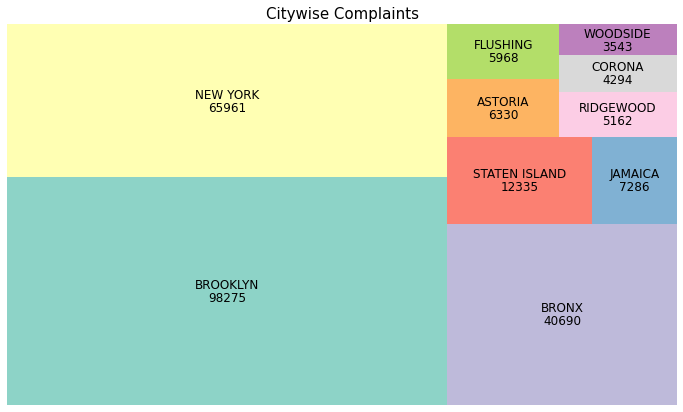

In [30]:
import squarify
import matplotlib

citywise_complaints = pd.DataFrame(df_data['City'].value_counts()[:10])
label = citywise_complaints.index
index = citywise_complaints['City']

plt.figure(figsize=(12,7))
squarify.plot(sizes=index, label=label, value=index,
              color=[matplotlib.cm.Set3(i) for i in range(10)],
              text_kwargs={'fontsize': 12})
plt.title('Citywise Complaints', fontsize=15)
plt.axis('off')
plt.show()

- Most complaints are from Brooklyn city followed by New York and Bronx

### Complaint Resolution

In [31]:
res_available_time = (df_data['Due Date']-df_data['Created Date']).astype('timedelta64[h]')
res_available_time.unique()

array([7., 8.])

- Time allocated to resolve a complaint after registration is 7-8 hrs.

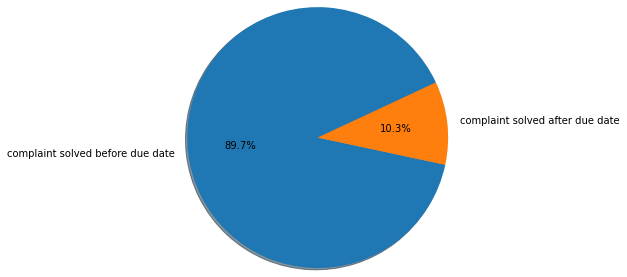

In [32]:
#create a 'Request_Closing_Time' as the time elapsed between request creation and request closing 
# also create 'Request_Overlap_Time for time elapsed between Request Clossing and request Due Date 

df_data['Request_Closing_Time'] = (df_data['Closed Date']-df_data['Created Date']).astype('timedelta64[h]')+1
df_data['Request_Overlap_Time'] = (df_data['Due Date']-df_data['Closed Date']).astype('timedelta64[h]')+1

solved_before_due = df_data[df_data['Request_Overlap_Time'] >=0]['Request_Overlap_Time'].value_counts().sum()
solved_after_due = df_data[df_data['Request_Overlap_Time'] <0]['Request_Overlap_Time'].value_counts().sum()


slices = ['complaint solved before due date','complaint solved after due date']
counts = [solved_before_due,solved_after_due]

plt.pie(counts, labels = slices, 
        startangle=25, shadow = True, 
        radius = 1.5, autopct = '%1.1f%%')
    
plt.show()

- It looks NYPD agency is quite efficient to solve the issues on time.
- 89.7 percent of complaints solved before due date and 10.3 percent solved after due date


- Graffiti took more time for complaint resolution followed by Derelict Vehicle.
- Graffiti complaints are very less and might not be on priority
- Derelict vehicle might be taking time because of some leaglity rules/issues.

In [33]:
#### Analysis of request resolution

df_data['Request_Closing_Time'].describe()

count    297964.000000
mean          4.814380
std           6.049467
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max         593.000000
Name: Request_Closing_Time, dtype: float64

- Average request closing time is 4.8 hrs. 75% of complaints are closed within 6 hrs.
- Few requests resolution took far more than the average time, we call them very rare cases and need to  gnore these outliers for better analysis.

In [34]:
#### Using z-statistics we will remove outliers for Z-score more than 3.

mean_time = df_data['Request_Closing_Time'].mean()
std_time = df_data['Request_Closing_Time'].std()
#Z = x-mean/Std

df_data['Z-score'] = ((df_data['Request_Closing_Time']-mean_time)/std_time)
df_data_1  = df_data[((df_data['Request_Closing_Time']-mean_time)/std_time)<3]
df_data_1['Request_Closing_Time'].describe()

count    293538.000000
mean          4.332270
std           3.661824
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          22.000000
Name: Request_Closing_Time, dtype: float64

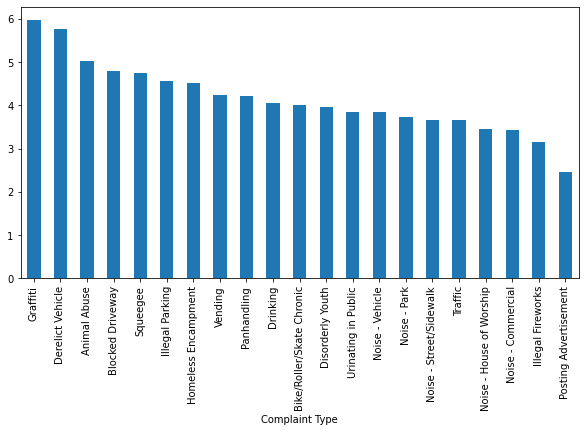

In [35]:
#### Overall complaint resolution response time.

overall_complaint_resolution = df_data_1.groupby(['Complaint Type'])['Request_Closing_Time'].mean()
overall_complaint_resolution.sort_values(ascending=False).plot.bar(figsize=(10,5)).Title=('Complaint')
plt.show()

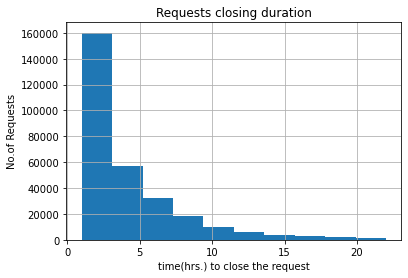

In [36]:
df_data_1['Request_Closing_Time'].hist(bins=10)
plt.xlabel('time(hrs.) to close the request')
plt.ylabel('No.of Requests')
plt.title('Requests closing duration')
plt.show()

 - More than half of request were solved within 1-3 hrs.
 - Most of the request solved within 10 hrs.

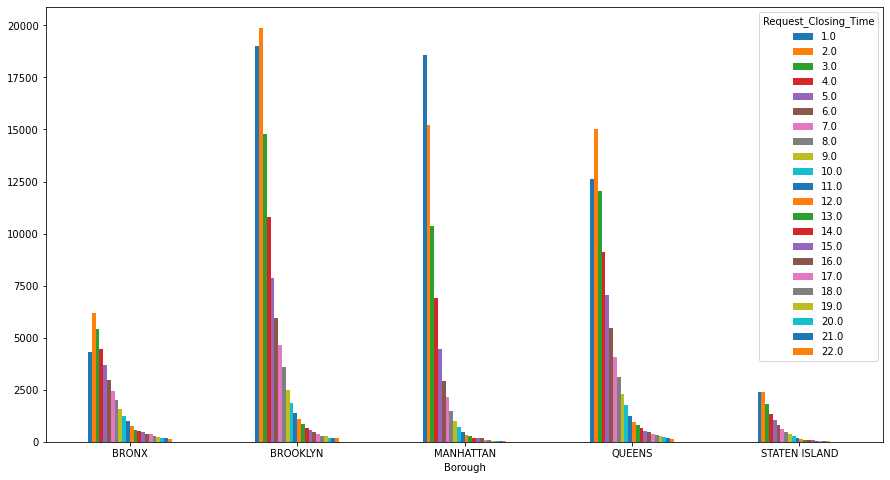

In [37]:
crosstb = pd.crosstab(df_data_1.Borough, df_data_1['Request_Closing_Time'])
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0,figsize=(15,8))
plt.show()

- NYPD is very efficient in Brooklyn and Manhattan borough as more than 18k complaints resolve within 1 hr and more than 
- 60 % complaint resolve within 3 hrs.

In [38]:
##### Borough wise hourly resolution for top 15 complaints

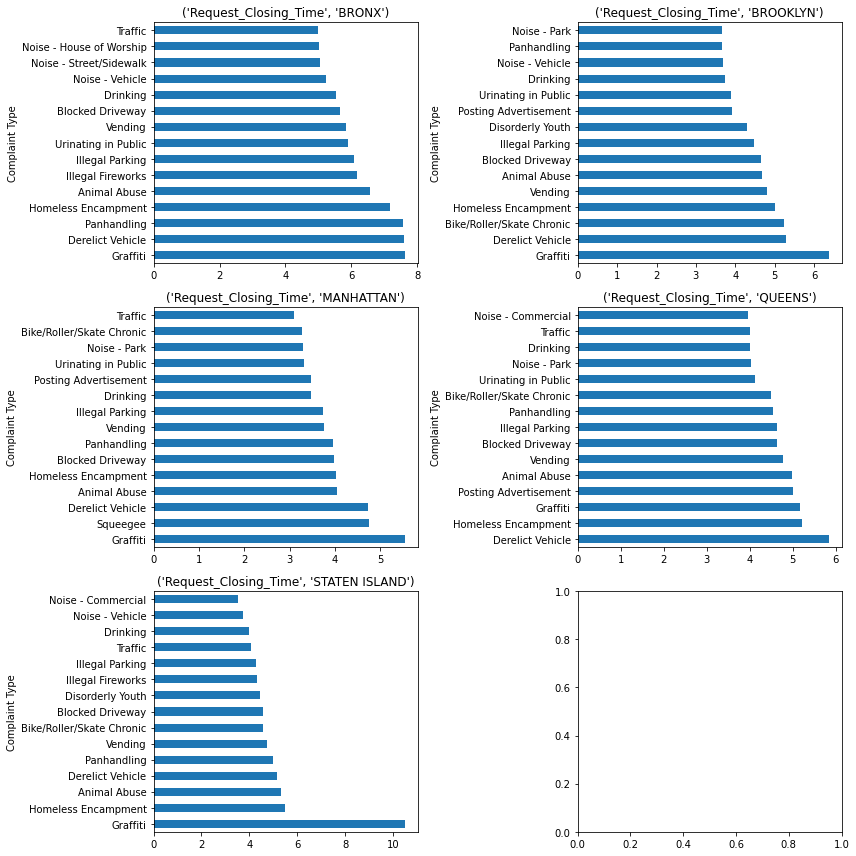

In [39]:
borough_complaint_resolution = df_data_1.groupby(['Complaint Type','Borough'])[['Request_Closing_Time']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_complaint_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=False)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()


- Grafiiti took more time to resolve followed by Derelict Vehicle
-  Noice related complaints solved efficiently, might be it has given high priority.


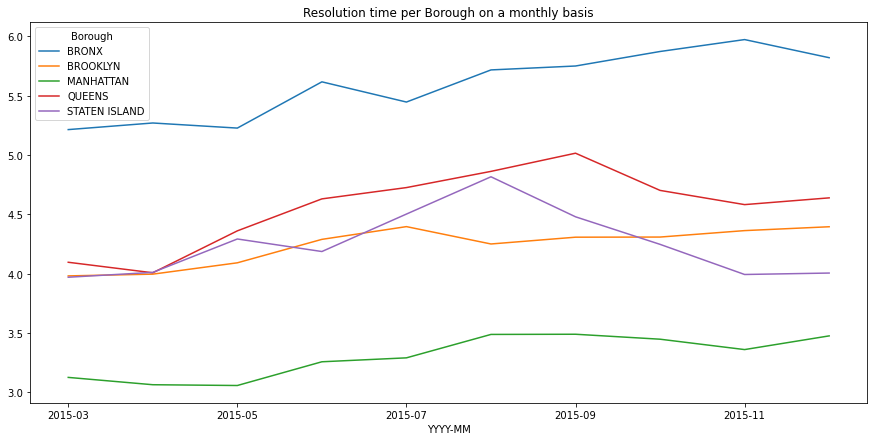

In [40]:
df_data_1.groupby(['YYYY-MM','Borough'])['Request_Closing_Time'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Resolution time per Borough on a monthly basis');


- Bronx took more time for issue resolution as compared to  other Borough
- Issue resolved quickly in Manhattan throughout year.

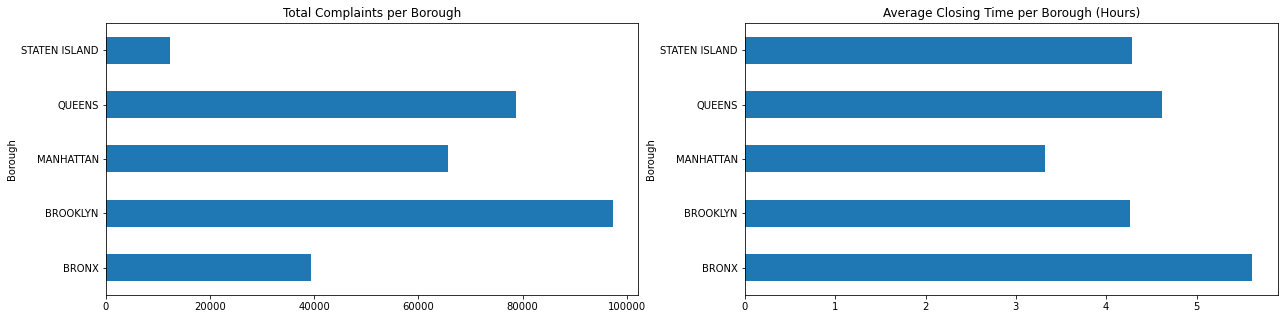

In [41]:
fig = plt.figure(figsize=(21,5))
plt.subplot(1, 2, 1)
df_data_1.groupby('Borough')['Borough'].size().plot(kind='barh',title='Total Complaints per Borough');

plt.subplot(1, 2, 2)
df_data_1.groupby('Borough')['Request_Closing_Time'].mean().plot(kind='barh',title='Average Closing Time per Borough (Hours)');
plt.show()


## Conclusion

 - Data is available for 9 months 29-Mar-2015 to 31-Dec-2015.
 - There are 4 different types of complaints, majority (99.25%) of complaints related with Closed complaint status, 
 - Highest complaints reported in May followed by Sep
 - Majority of complaints (83.4%) are related with Street/Sidewalk location type.
 - NYPD has efficiently solved 89.7% cases before due date.
 -  Out of 21 complaint types 4 types of complaints contributes more than 75% of complaints
     - 1. Blocked Driveway  - 25.75%
     - 2. Illegal Parking	 - 24.93%
     - 3. Noise - Street/Sidewalk - 16.10%
     - 4. Noise - Commercial - 11.80%
 - Majority of complaints are from Brooklyn followed by New York and Bronx cities.
 - Major complaint descriptors are 'Loud Music/Party' followed by 'No Access' and 'Posted Parking Sign Violation'
 - Peak time for complaint is at night between 9-12 PM and low time is in the morning 3-5 AM.
 - Graffiti complaints took highest time to resolve followed by Derelect vehicle. 
- Dataset contains 5 Boroughs. Borough related observations as follows

   #### Bronx
    - Number of complaints reported in this borough is 13.7%
    - Major complaints in this borough is 'Blocked Driveway' followed by 'Noise- Strret/Sidewalk' and Illegal Parking
    - Complaints are closed in this region is around 6 hrs. which is lowest amongst all borough.
    
   #### Brooklyn
     -  Highest number of complaints (33%) reported in this region
     -  Major complaints in this borough is ''Blocked Driveway' followed by Illegal Parking' and 'Noise- Strret/Sidewalk'
        Most of the 'Illegal Parking' reported in this borough as compared to other borough. 
     -  More than 60% complaints closed within 3 hrs. Average complaints closing time in this region is around 4 hrs.

   #### Manhattan
     -  Number of complaints reported in this of region is 22.1%
     -  Noise related complaints are more in Manhattan followed by 'Illegal Parking' Good things is that 'Blocked Driveaway' is 
        a lowest among all borough
     - Complaints closing performance is the best among all borough. Complaints are closed in this regionis around 3 hrs.
     
   #### Queens
     -  Second highest number of complaints (27.1%) reported in this region.
     -  Highest 'Blocked driveaway' and 'Derelect vehicle' complaints reported this borough. 
     -  Complaints are closed in this region is around 5 hrs.
     
   #### Staten Island
     -  Lowest number of complaints (4.1%) reported in this Borough
     -  Major complaints in this borough is 'Illegal Parking' followed by 'Blocked Driveway' 
     - Complaints are closed in this region is around 4.5 hrs.


#### Hypothesis testing

In [42]:
### 1. Whether the average response time across complaint types is similar or not (overall)
    
    #### For complaint types comparision we will take major top 6 complaints type which contributes more than 90 percent
    #### Compare the means of More than 2 groups and only one source of variablity (response time) so we will take one way "ANNOVA" test for it. 

In [43]:
### To get better analysis result we take the time in Minutes. 
df_data['Request_Closing_Minutes'] = (df_data['Closed Date']-df_data['Created Date']).astype('timedelta64[m]')+1


<AxesSubplot:>

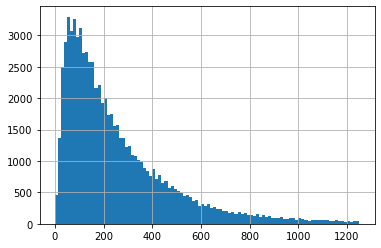

In [44]:
df_complaints = df_data[df_data['Complaint Type']=='Blocked Driveway']['Request_Closing_Minutes']
df_complaints.hist(bins=100,range=(0,1250))

In [45]:
df_complaints.describe()

count    76735.000000
mean       284.979579
std        334.257600
min          3.000000
25%         97.000000
50%        190.000000
75%        359.000000
max       8898.000000
Name: Request_Closing_Minutes, dtype: float64

In [46]:
#### There is a large difference in min and max Request Closing Time, as there is a too much variablity in the data.
#### We use log transformation to normalize data.

data = {}
unique_complaints = df_data['Complaint Type'].unique() 

for complaint in unique_complaints:
    data[complaint] = np.log(df_data[df_data['Complaint Type']==complaint]['Request_Closing_Minutes'])


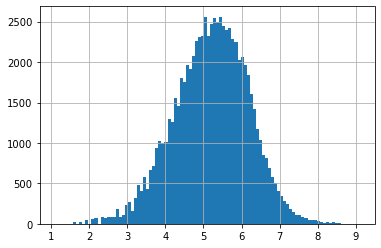

In [47]:
#### We can verify the normalize data distribution

data['Blocked Driveway'].hist(bins=100)
plt.show()

In [48]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

#Hypotheseis test
#H0 - Average response time across complaint types is similar
#H1 - Average response time across complaint types is not similar

# Top 6 complaints type 

stat, p = f_oneway(data['Blocked Driveway'],data['Illegal Parking'],data['Noise - Street/Sidewalk'],data['Noise - Commercial'],
                   data['Derelict Vehicle'],data['Noise - Vehicle'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0, Average response time across complaint types is similar)')
else:
    print('Reject H0, Average response time across complaint types is not similar')


Statistics=2062.454, p=0.000
Reject H0, Average response time across complaint types is not similar


In [49]:
# 2. Are the type of complaint or service requested and location related?

In [50]:
#### To check location and complaint type correlation, we can use person correlation matrix for comparision 

In [51]:
#### For location we take following features
#### Borough','City','Longitude','Latitude'

corr_features = df_data[['Complaint Type','Borough','City','Longitude','Latitude']]
corr_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297964 entries, 0 to 300697
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Complaint Type  297964 non-null  object 
 1   Borough         297964 non-null  object 
 2   City            297964 non-null  object 
 3   Longitude       296998 non-null  float64
 4   Latitude        296998 non-null  float64
dtypes: float64(2), object(3)
memory usage: 13.6+ MB


- For correlation comparision all features must be numeric.
- Complaint Type, Borough, City are object type features, we need to convert them into numeric.

In [52]:
#### To convert Object features to numeric using cat codes first we need to convert feature into category type

corr_features[['Complaint Type','Borough','City']] = corr_features[['Complaint Type','Borough','City']].astype('category')

corr_features['Complaint Type'] = corr_features['Complaint Type'].cat.codes
corr_features['Borough'] = corr_features['Borough'].cat.codes
corr_features['City'] = corr_features['City'].cat.codes


In [53]:
corr_features.head()


,Complaint Type,Borough,City,Longitude,Latitude
0,13,2,33,-73.923501,40.865682
1,2,3,1,-73.915094,40.775945
2,2,0,6,-73.888525,40.870325
3,9,0,6,-73.828379,40.835994
4,9,3,13,-73.874170,40.733060


In [54]:
corr_features.corr(method='pearson')

,Complaint Type,Borough,City,Longitude,Latitude
Complaint Type,1.000000,-0.067033,0.095842,-0.182643,0.154141
Borough,-0.067033,1.000000,0.717799,0.021383,-0.249472
City,0.095842,0.717799,1.000000,-0.124015,-0.000545
Longitude,-0.182643,0.021383,-0.124015,1.000000,0.364963
Latitude,0.154141,-0.249472,-0.000545,0.364963,1.000000


- There is no correlation between Complaint type and Location.